In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
actions = ['cold', 'dizziness', 'allergic_reaction', 'snot', 'unwell', 'hello', 'myself']
actions = np.array(actions)

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
label_map

{'cold': 0,
 'dizziness': 1,
 'allergic_reaction': 2,
 'snot': 3,
 'unwell': 4,
 'hello': 5,
 'myself': 6}

In [5]:
sequences, labels = [], []
for action in actions:
    for sequence in range(200):
        window = []
        for frame_num in range(90):
            res = np.load(os.path.join('keypoints', action, str(sequence+1), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [6]:
np.array(sequences).shape

(1400, 90, 1662)

In [7]:
np.array(labels).shape

(1400,)

In [8]:
X = np.array(sequences)

In [9]:
X.shape

(1400, 90, 1662)

In [10]:
y = to_categorical(labels).astype(int)

In [11]:
y.shape

(1400, 7)

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
X_scale = scaler.fit_transform(X.reshape(X.shape[0], -1)).reshape(X.shape)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1)

In [15]:
X_test.shape

(140, 90, 1662)

In [16]:
y_test.shape

(140, 7)

# Experimentation

In [17]:
def ex_model(model_x, name='model'):
    history_model_x = model_x.fit(X_train, y_train, epochs=100, validation_split=0.1)
    print('<-------------------------------------------------------------------->')
    model_x.evaluate(X_test, y_test)
    print('<-------------------------------------------------------------------->')
    model_x.summary()
    print('<-------------------------------------------------------------------->')
    # accuracy 
    plt.plot(history_model_x.history['categorical_accuracy'])
    plt.plot(history_model_x.history['val_categorical_accuracy'])
    plt.title('{} accuracy'.format(name))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    return history_model_x

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

### L8D16

In [19]:
model_L8D16 = Sequential()
model_L8D16.add(LSTM(8, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model_L8D16.add(Dense(16, activation='relu'))
model_L8D16.add(Dense(actions.shape[0], activation='softmax'))
model_L8D16.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) , loss='categorical_crossentropy', metrics='categorical_accuracy')

### L32D16

In [20]:
model_L32D16 = Sequential()
model_L32D16.add(LSTM(32, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model_L32D16.add(Dense(16, activation='relu'))
model_L32D16.add(Dense(actions.shape[0], activation='softmax'))
model_L32D16.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001) , loss='categorical_crossentropy', metrics='categorical_accuracy')

### L32D32

In [21]:
model_L32D32 = Sequential()
model_L32D32.add(LSTM(32, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model_L32D32.add(Dense(32, activation='relu'))
model_L32D32.add(Dense(actions.shape[0], activation='softmax'))
model_L32D32.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001) , loss='categorical_crossentropy', metrics='categorical_accuracy')

### L32L32D64

In [22]:
model_L32L32D64 = Sequential()
model_L32L32D64.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(90, 1662)))
model_L32L32D64.add(LSTM(32, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model_L32L32D64.add(Dense(64, activation='relu'))
model_L32L32D64.add(Dense(actions.shape[0], activation='softmax'))
model_L32L32D64.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001) , loss='categorical_crossentropy', metrics='categorical_accuracy')

### L64D32

In [23]:
model_L64D32 = Sequential()
model_L64D32.add(LSTM(64, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model_L64D32.add(Dense(32, activation='relu'))
model_L64D32.add(Dense(actions.shape[0], activation='softmax'))
model_L64D32.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001) , loss='categorical_crossentropy', metrics='categorical_accuracy')

### L64D64

In [24]:
model_L64D64 = Sequential()
model_L64D64.add(LSTM(64, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model_L64D64.add(Dense(64, activation='relu'))
model_L64D64.add(Dense(actions.shape[0], activation='softmax'))
model_L64D64.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001) , loss='categorical_crossentropy', metrics='categorical_accuracy')

### L64L32D32

In [25]:
model_L64L32D32 = Sequential()
model_L64L32D32.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(90, 1662)))
model_L64L32D32.add(LSTM(32, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model_L64L32D32.add(Dense(32, activation='relu'))
model_L64L32D32.add(Dense(actions.shape[0], activation='softmax'))
model_L64L32D32.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001) , loss='categorical_crossentropy', metrics='categorical_accuracy')

### L64L64D32

In [26]:
model_L64L64D32 = Sequential()
model_L64L64D32.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(90, 1662)))
model_L64L64D32.add(LSTM(64, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model_L64L64D32.add(Dense(32, activation='relu'))
model_L64L64D32.add(Dense(actions.shape[0], activation='softmax'))
model_L64L64D32.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001) , loss='categorical_crossentropy', metrics='categorical_accuracy')

1. 8 LSTM + 16 Dense
2. 32 LSTM + 16 Dense
3. 32 LSTM + 32 Dense
4. 32 LSTM + 32 LSTM + 64 Dense
5. 64 LSTM + 32 Dense
6. 64 LSTM + 64 Dense
7. 64 LSTM + 32 LSTM + 32 Dense
8. 64 LSTM + 64 LSTM + 32 Dense

Epoch 1/100


2023-01-10 10:17:47.523416: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


36/36 [==============================] - 2s 34ms/step - loss: 1.9206 - categorical_accuracy: 0.1781 - val_loss: 1.9183 - val_categorical_accuracy: 0.1270
Epoch 2/100
36/36 [==============================] - 1s 28ms/step - loss: 1.8430 - categorical_accuracy: 0.2046 - val_loss: 1.8173 - val_categorical_accuracy: 0.2222
Epoch 3/100
36/36 [==============================] - 1s 29ms/step - loss: 1.8032 - categorical_accuracy: 0.2399 - val_loss: 1.7993 - val_categorical_accuracy: 0.2698
Epoch 4/100
36/36 [==============================] - 1s 28ms/step - loss: 1.7774 - categorical_accuracy: 0.2337 - val_loss: 1.8115 - val_categorical_accuracy: 0.1825
Epoch 5/100
36/36 [==============================] - 1s 28ms/step - loss: 1.7401 - categorical_accuracy: 0.2875 - val_loss: 1.8201 - val_categorical_accuracy: 0.2302
Epoch 6/100
36/36 [==============================] - 1s 29ms/step - loss: 1.8553 - categorical_accuracy: 0.2257 - val_loss: 1.8644 - val_categorical_accuracy: 0.2222
Epoch 7/100
36/3

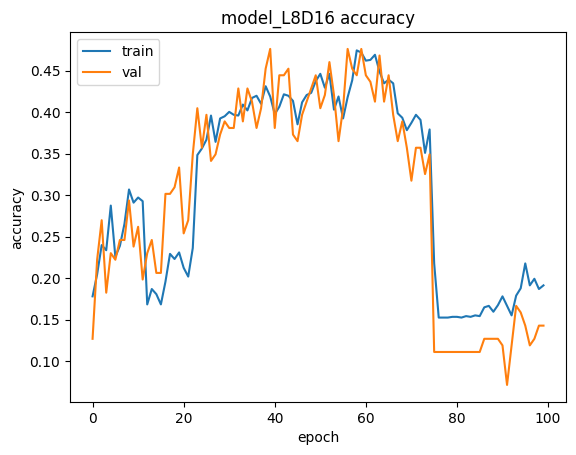

In [27]:
history_L8D16 = ex_model(model_L8D16, 'model_L8D16')

Epoch 1/100
36/36 [==============================] - 3s 75ms/step - loss: 2.0763 - categorical_accuracy: 0.0732 - val_loss: 1.9983 - val_categorical_accuracy: 0.0476
Epoch 2/100
36/36 [==============================] - 2s 47ms/step - loss: 1.9695 - categorical_accuracy: 0.0988 - val_loss: 1.9671 - val_categorical_accuracy: 0.0952
Epoch 3/100
36/36 [==============================] - 2s 46ms/step - loss: 1.9549 - categorical_accuracy: 0.1190 - val_loss: 1.9594 - val_categorical_accuracy: 0.0952
Epoch 4/100
36/36 [==============================] - 2s 46ms/step - loss: 1.9379 - categorical_accuracy: 0.1367 - val_loss: 1.9341 - val_categorical_accuracy: 0.1429
Epoch 5/100
36/36 [==============================] - 2s 46ms/step - loss: 1.9172 - categorical_accuracy: 0.1605 - val_loss: 1.9130 - val_categorical_accuracy: 0.1429
Epoch 6/100
36/36 [==============================] - 2s 46ms/step - loss: 1.8988 - categorical_accuracy: 0.1526 - val_loss: 1.8935 - val_categorical_accuracy: 0.1508
Epoc

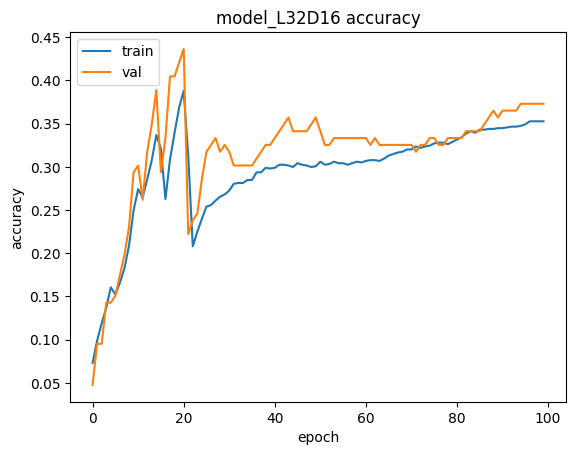

In [28]:
history_L32D16 = ex_model(model_L32D16, 'model_L32D16')

Epoch 1/100
36/36 [==============================] - 3s 47ms/step - loss: 1456.1552 - categorical_accuracy: 0.1499 - val_loss: 681.1676 - val_categorical_accuracy: 0.1746
Epoch 2/100
36/36 [==============================] - 2s 43ms/step - loss: 738.9860 - categorical_accuracy: 0.1420 - val_loss: 517.1605 - val_categorical_accuracy: 0.1667
Epoch 3/100
36/36 [==============================] - 2s 44ms/step - loss: 424.6641 - categorical_accuracy: 0.1384 - val_loss: 288.6382 - val_categorical_accuracy: 0.1667
Epoch 4/100
36/36 [==============================] - 2s 44ms/step - loss: 328.2538 - categorical_accuracy: 0.1305 - val_loss: 224.9274 - val_categorical_accuracy: 0.1667
Epoch 5/100
36/36 [==============================] - 2s 44ms/step - loss: 296.5352 - categorical_accuracy: 0.1305 - val_loss: 218.3599 - val_categorical_accuracy: 0.1667
Epoch 6/100
36/36 [==============================] - 2s 43ms/step - loss: 274.4572 - categorical_accuracy: 0.1261 - val_loss: 198.7394 - val_categori

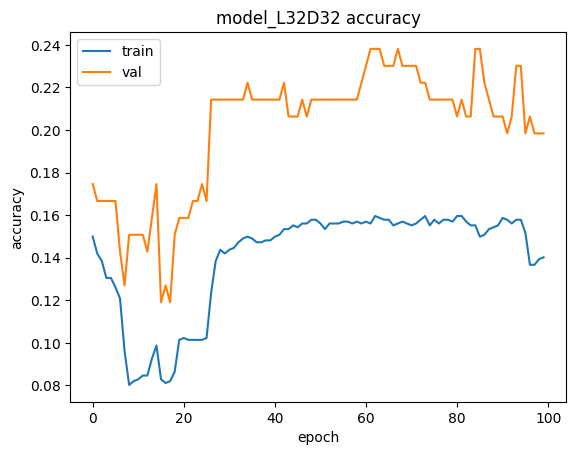

In [29]:
history_L32D32 = ex_model(model_L32D32, 'model_L32D32')

Epoch 1/100
36/36 [==============================] - 4s 77ms/step - loss: 21152.1133 - categorical_accuracy: 0.1332 - val_loss: 53465.3242 - val_categorical_accuracy: 0.1825
Epoch 2/100
36/36 [==============================] - 2s 57ms/step - loss: 68487.6953 - categorical_accuracy: 0.1314 - val_loss: 61234.5195 - val_categorical_accuracy: 0.1746
Epoch 3/100
36/36 [==============================] - 2s 59ms/step - loss: 54542.7109 - categorical_accuracy: 0.1332 - val_loss: 81740.1484 - val_categorical_accuracy: 0.1825
Epoch 4/100
36/36 [==============================] - 2s 59ms/step - loss: 63765.0156 - categorical_accuracy: 0.1393 - val_loss: 51788.7031 - val_categorical_accuracy: 0.1825
Epoch 5/100
36/36 [==============================] - 3s 72ms/step - loss: 42155.0938 - categorical_accuracy: 0.1376 - val_loss: 43355.1289 - val_categorical_accuracy: 0.2063
Epoch 6/100
36/36 [==============================] - 2s 69ms/step - loss: 30133.9922 - categorical_accuracy: 0.1473 - val_loss: 41

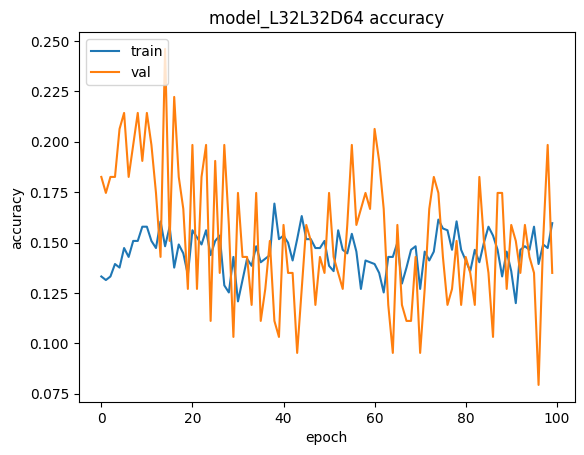

In [30]:
history_L32L32D64 = ex_model(model_L32L32D64, 'model_L32L32D64')

Epoch 1/100
36/36 [==============================] - 3s 69ms/step - loss: 2.0087 - categorical_accuracy: 0.1499 - val_loss: 1.9046 - val_categorical_accuracy: 0.1667
Epoch 2/100
36/36 [==============================] - 3s 77ms/step - loss: 1.9059 - categorical_accuracy: 0.2205 - val_loss: 1.8272 - val_categorical_accuracy: 0.4048
Epoch 3/100
36/36 [==============================] - 3s 79ms/step - loss: 1.8226 - categorical_accuracy: 0.3148 - val_loss: 1.7500 - val_categorical_accuracy: 0.3571
Epoch 4/100
36/36 [==============================] - 3s 79ms/step - loss: 1.7514 - categorical_accuracy: 0.3201 - val_loss: 1.6770 - val_categorical_accuracy: 0.3968
Epoch 5/100
36/36 [==============================] - 3s 80ms/step - loss: 1.7205 - categorical_accuracy: 0.3236 - val_loss: 1.6617 - val_categorical_accuracy: 0.3968
Epoch 6/100
36/36 [==============================] - 3s 80ms/step - loss: 1.6682 - categorical_accuracy: 0.3862 - val_loss: 1.6228 - val_categorical_accuracy: 0.3651
Epoc

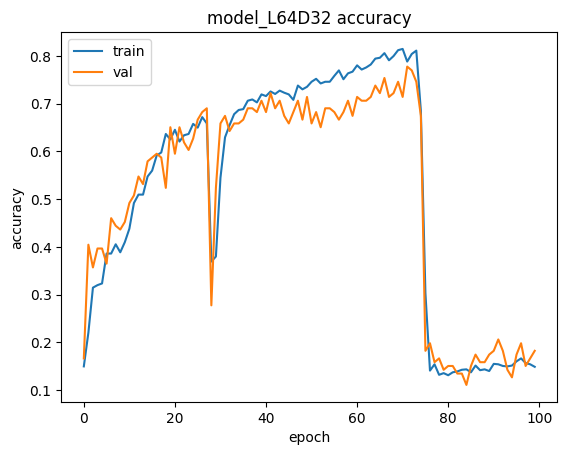

In [31]:
history_L64D32 = ex_model(model_L64D32, 'model_L64D32')

Epoch 1/100
36/36 [==============================] - 3s 71ms/step - loss: 12.7821 - categorical_accuracy: 0.1393 - val_loss: 8.3595 - val_categorical_accuracy: 0.1111
Epoch 2/100
36/36 [==============================] - 2s 66ms/step - loss: 8.9973 - categorical_accuracy: 0.1270 - val_loss: 8.8567 - val_categorical_accuracy: 0.1111
Epoch 3/100
36/36 [==============================] - 3s 73ms/step - loss: 10.5904 - categorical_accuracy: 0.1340 - val_loss: 9.2575 - val_categorical_accuracy: 0.1111
Epoch 4/100
36/36 [==============================] - 3s 81ms/step - loss: 9.9376 - categorical_accuracy: 0.1305 - val_loss: 8.9233 - val_categorical_accuracy: 0.1032
Epoch 5/100
36/36 [==============================] - 3s 79ms/step - loss: 9.7503 - categorical_accuracy: 0.1287 - val_loss: 8.6704 - val_categorical_accuracy: 0.1111
Epoch 6/100
36/36 [==============================] - 3s 81ms/step - loss: 8.9772 - categorical_accuracy: 0.1323 - val_loss: 8.4149 - val_categorical_accuracy: 0.1270
Ep

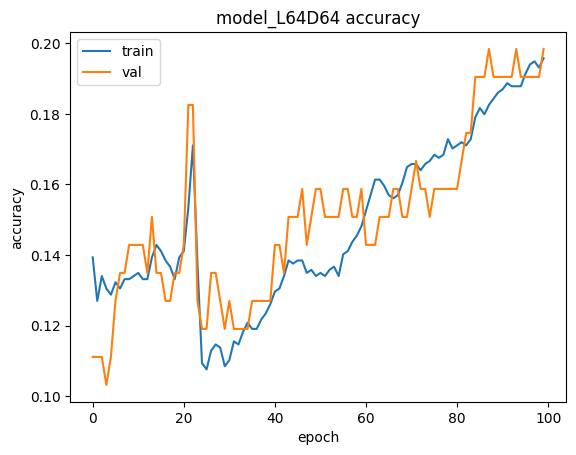

In [32]:
history_L64D64 = ex_model(model_L64D64, 'model_L64D64')

Epoch 1/100
36/36 [==============================] - 5s 87ms/step - loss: 118.2934 - categorical_accuracy: 0.1340 - val_loss: 96.0407 - val_categorical_accuracy: 0.0952
Epoch 2/100
36/36 [==============================] - 3s 83ms/step - loss: 213.6112 - categorical_accuracy: 0.1190 - val_loss: 718.9963 - val_categorical_accuracy: 0.1349
Epoch 3/100
36/36 [==============================] - 3s 91ms/step - loss: 628.1310 - categorical_accuracy: 0.1199 - val_loss: 692.5428 - val_categorical_accuracy: 0.1190
Epoch 4/100
36/36 [==============================] - 3s 90ms/step - loss: 553.5848 - categorical_accuracy: 0.1129 - val_loss: 533.5702 - val_categorical_accuracy: 0.1032
Epoch 5/100
36/36 [==============================] - 3s 93ms/step - loss: 567.2322 - categorical_accuracy: 0.1208 - val_loss: 649.1381 - val_categorical_accuracy: 0.1032
Epoch 6/100
36/36 [==============================] - 4s 104ms/step - loss: 518.0850 - categorical_accuracy: 0.0988 - val_loss: 419.4681 - val_categoric

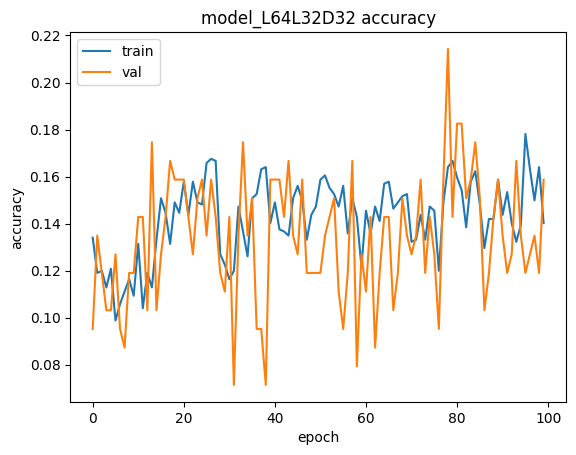

In [33]:
history_L64L32D32 = ex_model(model_L64L32D32, 'model_L64L32D32')

Epoch 1/100
36/36 [==============================] - 6s 130ms/step - loss: 2.1424 - categorical_accuracy: 0.1384 - val_loss: 1.9646 - val_categorical_accuracy: 0.1746
Epoch 2/100
36/36 [==============================] - 3s 94ms/step - loss: 1.9611 - categorical_accuracy: 0.1384 - val_loss: 1.9601 - val_categorical_accuracy: 0.1746
Epoch 3/100
36/36 [==============================] - 3s 97ms/step - loss: 1.9546 - categorical_accuracy: 0.1384 - val_loss: 1.9563 - val_categorical_accuracy: 0.1746
Epoch 4/100
36/36 [==============================] - 4s 100ms/step - loss: 1.9467 - categorical_accuracy: 0.1384 - val_loss: 1.9483 - val_categorical_accuracy: 0.1746
Epoch 5/100
36/36 [==============================] - 4s 102ms/step - loss: 1.9359 - categorical_accuracy: 0.1481 - val_loss: 1.9324 - val_categorical_accuracy: 0.1825
Epoch 6/100
36/36 [==============================] - 4s 104ms/step - loss: 1.9223 - categorical_accuracy: 0.1464 - val_loss: 1.9102 - val_categorical_accuracy: 0.1746


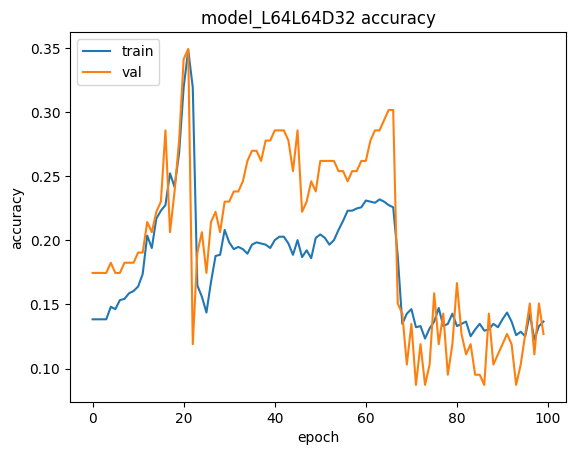

In [34]:
history_L64L64D32 = ex_model(model_L64L64D32, 'model_L64L64D32')

In [1]:
plt.plot(history_L64L64D32.history['categorical_loss'])
plt.plot(history_L64L64D32.history['val_categorical_loss'])
plt.title('{} loss'.format(name))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined